In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
path = 'movie_data.csv'
data = pd.read_csv(path, sep=';', decimal='.')

# Also make it datetime instead of a string
data['release_date'] = pd.to_datetime(data['release_date'])

# Trabajo A

### Summary Statistics:

Use descriptive statistics like mean, median, mode, and standard deviation to understand the central tendency and spread of numerical variables such as 'budget,' 'popularity,' 'revenue,' 'runtime,' 'vote average,' and 'vote count.'

In [3]:
decimals = 2

def describex(data):
        data = pd.DataFrame(data)
        stats = data.describe().round(decimals)
        skewness = data.skew().round(decimals)
        kurtosis = data.kurtosis().round(decimals)
        skewness_df = pd.DataFrame({'skewness':skewness}).T
        kurtosis_df = pd.DataFrame({'kurtosis':kurtosis}).T
        
        return stats.append([kurtosis_df,skewness_df]).drop(['count','25%','50%','75%'])

describex(data)

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
mean,3.124037e+07,9.26,2.93,1.36,9.071296e+07,110.25,1.48,6.29,724.59
std,3.912379e+07,6.02,2.17,0.77,1.578984e+08,21.47,0.92,0.90,1193.10
min,1.000000e+00,0.00,0.00,0.00,1.001800e+04,26.00,0.00,0.00,0.00
max,3.800000e+08,54.58,26.00,12.00,2.068224e+09,338.00,9.00,9.10,14075.00
kurtosis,8.300000e+00,8.55,11.68,15.52,2.175000e+01,6.65,8.68,1.94,16.80
skewness,2.520000e+00,2.00,2.34,2.95,3.870000e+00,1.64,2.55,-0.65,3.52


### Bar Plots:
For categorical variables like 'genres' and 'spoken languages,' use bar plots to show the frequency of each category. This provides insights into the composition of your dataset.

- Genres (count)
- year (count)

### box plots
- Revenue, runtime (in one plot)
- Revenue (per genre)

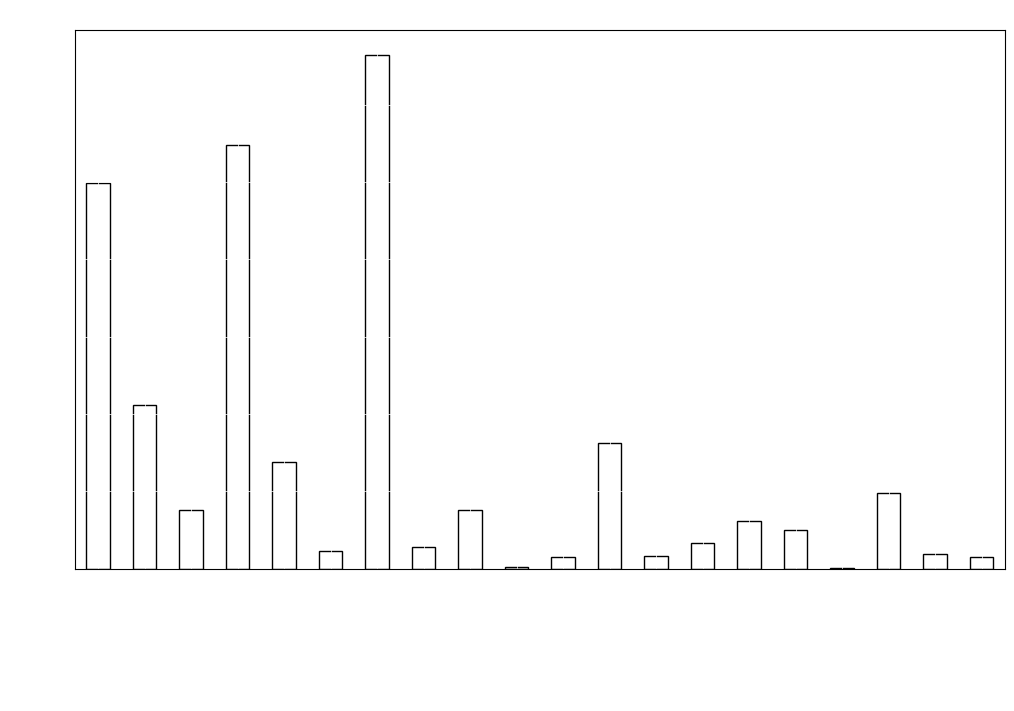

In [4]:
fig_size = [12, 7]

def plot_bar(data, column=None, title=None, large=False):
    if column is None:
        raise ValueError('column must be specified')
   
    # Sort the DataFrame by the specified column
    data_sorted = data.sort_values(by=column)

    if large:
        # Plot only every 10th label
        subset_labels = data_sorted[column].unique()[::10]
        data_sorted = data_sorted[data_sorted[column].isin(subset_labels)]
    
    # Create a figure with a transparent background
    fig, ax = plt.subplots(figsize=(fig_size[0], fig_size[1]), facecolor='none')
    
    # Set the background color of the axes to be transparent
    ax.set_facecolor('none')
    
    # Plot the bar chart with white-colored elements
    data_sorted[column].value_counts().sort_index().plot(kind='bar', ax=ax, color='white', edgecolor='black')
    
    # Set the title with white color
    ax.set_title(title, color='white')
    
    # Set the x-axis and y-axis labels with white color
    ax.set_xlabel(column, color='white')
    ax.set_ylabel('Count', color='white')
    
    # Set the color of tick labels on the x-axis and y-axis to white
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    
    # Set the color of the grid lines to white
    ax.grid(color='white', linestyle='-', linewidth=0.5)
    
    # Show the plot
    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame with the movie data
plot_bar(data, column='genres', title='Genres bar chart')


In [6]:
data_sorted = data.sort_values(by='release_year')
fig_size = [8, 6]
plt.figure(figsize=(fig_size[0], fig_size[1]))

counts = data_sorted['release_year'].value_counts().sort_index()
plt.bar(range(len(counts)), counts)

# Customize x-axis tick positions and labels (show every 10th label)
n = 10
plt.xticks(range(0, len(counts), n), counts.index[::n])

plt.title('Releases per Year')
plt.show()

KeyError: 'release_year'

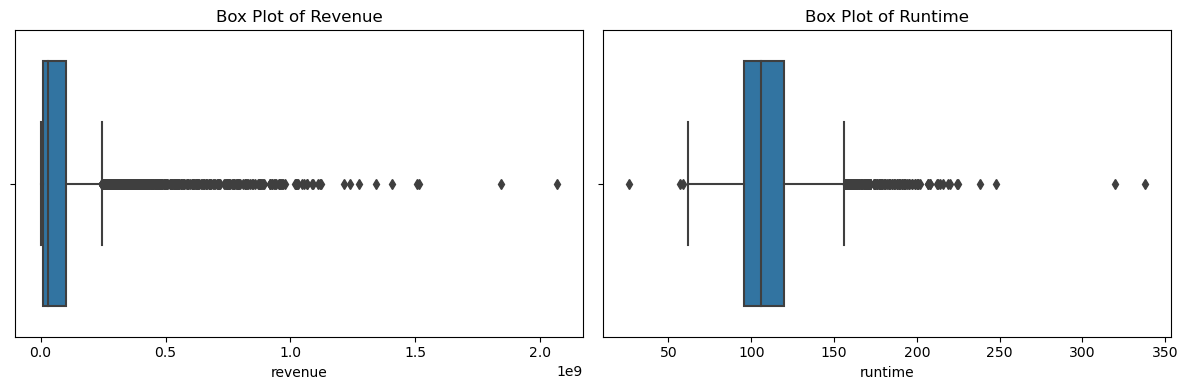

In [7]:
# Create two box plots side by side
plt.figure(figsize=(12, 4))

# Box Plot for 'revenue'
plt.subplot(1, 2, 1)
sns.boxplot(x='revenue', data=data)
plt.title('Box Plot of Revenue')

# Box Plot for 'runtime'
plt.subplot(1, 2, 2)
sns.boxplot(x='runtime', data=data)
plt.title('Box Plot of Runtime')

plt.tight_layout()
plt.show()

### Scatter Plots

- budget - revenue
- budget - popularity
- runtime - vote_average
- release _date - popularity

In [8]:
data.head(1)

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0


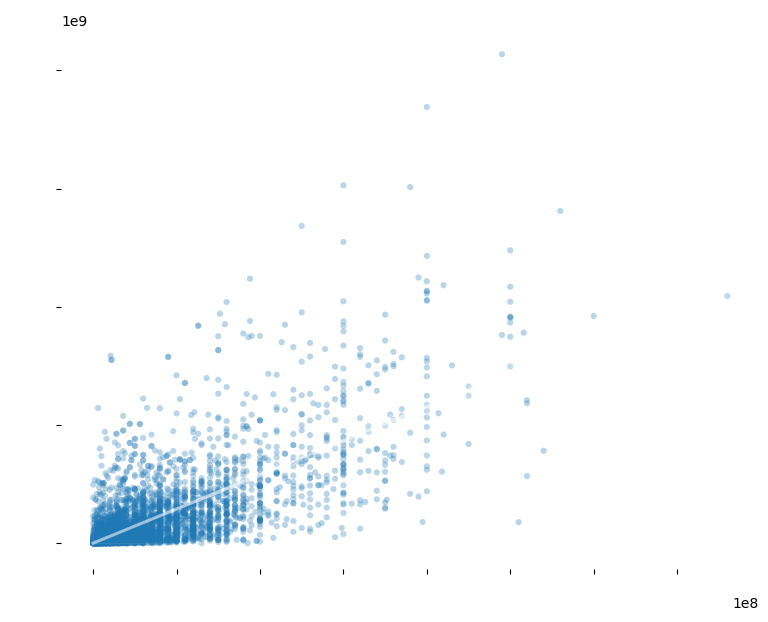

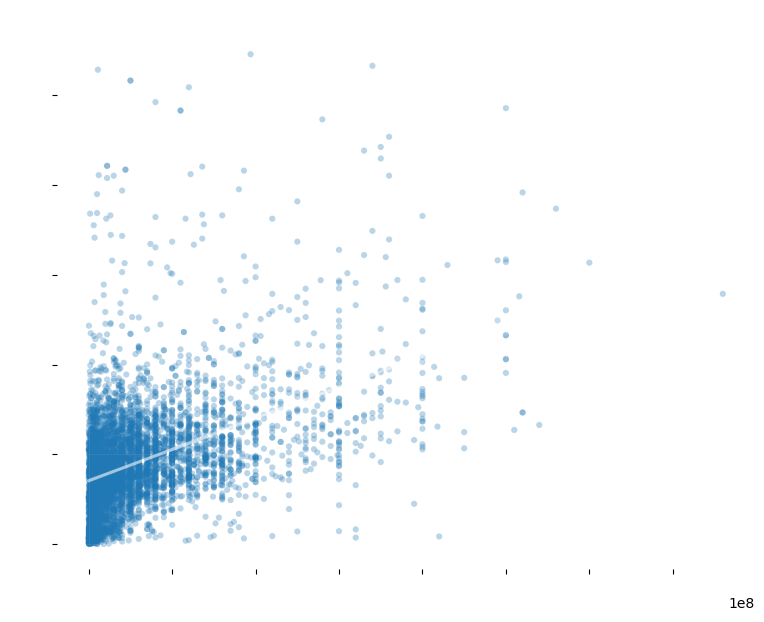

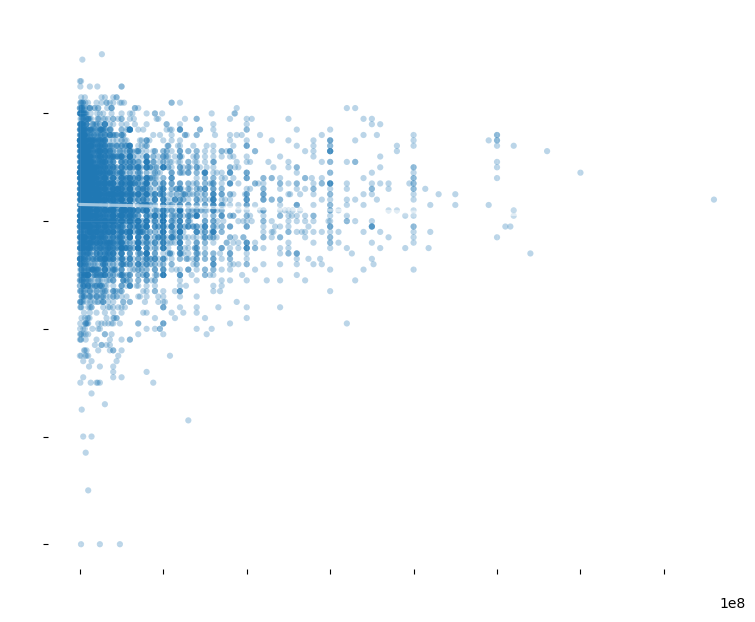

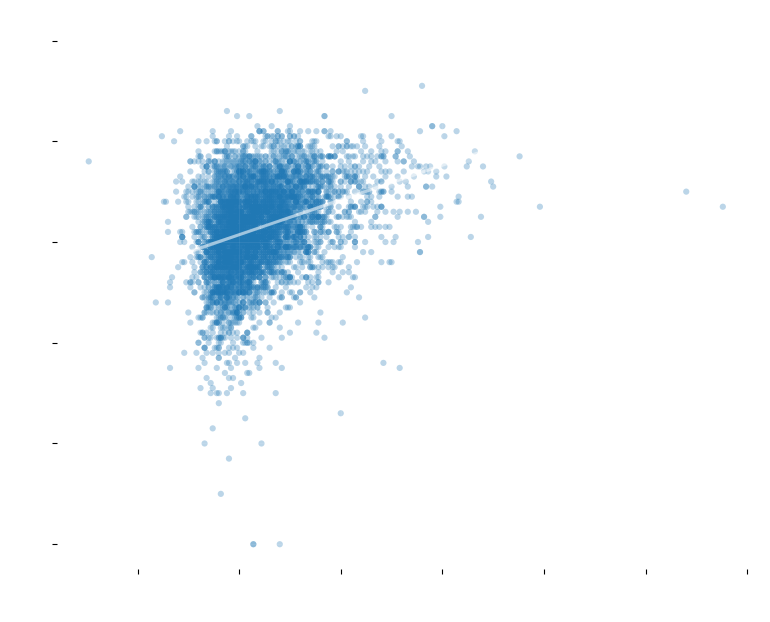

KeyError: 'release_year'

<Figure size 900x700 with 0 Axes>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatterplot_with_regression(data, x_column, y_column):
    plt.figure(figsize=(9, 7), facecolor='none')

    # Convert 'release_date' to numerical format
    data['release_date_numeric'] = data['release_date'].astype(int)

    sns.regplot(
        x=x_column,
        y=y_column,
        data=data,
        scatter_kws={'s': 20, 'alpha': 0.3, 'edgecolors': 'none'},
        line_kws={'color': 'white', 'alpha': 0.5}
    )

    plt.title(f"{x_column} vs {y_column}", color='white')
    plt.xlabel(x_column, color='white')
    plt.ylabel(y_column, color='white')
    
    # Set the color of tick labels on the x-axis and y-axis to white
    plt.xticks(color='white')
    plt.yticks(color='white')
    
    # Set the color of the grid lines to white
    plt.grid(color='white', linestyle='-', linewidth=0.5, alpha=0.1)
    
    # Remove the box around the plot
    plt.box(on=None)

    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame with the movie data
scatterplot_with_regression(data, x_column='budget', y_column='revenue')
scatterplot_with_regression(data, x_column='budget', y_column='popularity')
scatterplot_with_regression(data, x_column='budget', y_column='vote_average')
scatterplot_with_regression(data, x_column='runtime', y_column='vote_average')
scatterplot_with_regression(data, x_column='release_year', y_column='popularity')
